###This notebook prepares a spline input to the relative entropy code

In [1]:
import pandas as pd
from scipy.optimize import curve_fit
from numpy import power, linspace, tanh, array
import matplotlib.pyplot as plt
%matplotlib inline 

**Simple IPL potential to fit the re potential and parameters**

In [2]:
def ipl_pot(R, d, a, A, k, r_cut, dr, r_shrink):
    UR = A*power(d/R, a)*((1.0 - tanh(k*(R/d - r_shrink)))/2.0)
    UR = UR - UR[-1]
    return UR

**Function to make the initial guess**

In [3]:
def init_guess(R, UR, N_fix):
    #oprn filestream
    parameters_filestream = open("parameters.txt", 'w')
                    
    for i in range(0, len(R) - N_fix):
        line = "%0.15f\n" % R[i]
        parameters_filestream.write(line)
        line = "%0.15f\n" % (UR[i] - UR[i + 1])
        parameters_filestream.write(line)
        line = "%d\n" % 1
        parameters_filestream.write(line)
    
    for i in range(len(R) - N_fix, len(R) - 1):
        line = "%0.15f\n" % R[i]
        parameters_filestream.write(line)
        line = "%0.15f\n" % (UR[i] - UR[i + 1])
        parameters_filestream.write(line)
        line = "%d\n" % 0
        parameters_filestream.write(line)
        
    #final line for cut point
    line = "%0.15f\n" % R[-1]
    parameters_filestream.write(line)
        
    parameters_filestream.close()

**Parameters to generate initial guess**

In [15]:
#trial ipl params
d = 1.0
a = 5.0
A = 8.0
k = 9.0

#re potential constraints
r_cut = 3.00
dr = 0.1
N_opt = 26
N_fix = 3
r_shrink = 2.40

#vector of r values
R_temp = [r_cut - i*dr for i in range(N_opt + N_fix)]
R_temp.reverse()
R = array(R_temp)

#get the potential
UR = ipl_pot(R, 
             d, a, A, k, 
             r_cut, dr, r_shrink)

**Generate initial guess file**

In [17]:
init_guess(R, UR, N_fix)

**Plot our initial guess**

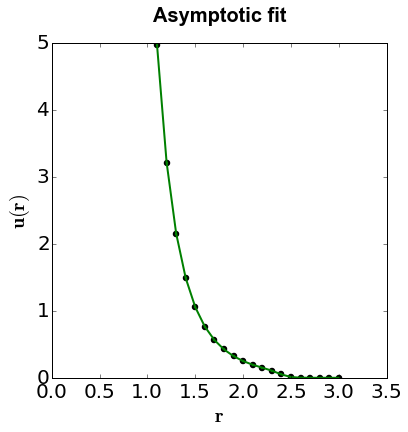

In [18]:
#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}
axescolor = '#f6f6f6'

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#actual data and labeling
plt.xlabel('$\mathbf{r}$', fontsize=20, fontdict = axis_label_font)
plt.ylabel('$\mathbf{u(r)}$', fontsize=20, fontdict = axis_label_font)
plt.plot(R, UR, c="g", linestyle = '-', linewidth = 2)
plt.scatter(R, UR, c="g", linestyle = '-', linewidth = 2)
plt.ylim((0,5.0))
plt.xlim((0,3.5))

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
plt.title("Asymptotic fit", y=1.05, fontdict = title_font)

In [16]:
print R
print UR

[ 0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6
  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3. ]
[  2.50000000e+04   3.29218107e+03   7.81249999e+02   2.55999999e+02
   1.02880658e+02   4.75992139e+01   2.44140618e+01   1.35480696e+01
   7.99999933e+00   4.96736991e+00   3.21501990e+00   2.15463192e+00
   1.48747476e+00   1.05349717e+00   7.62938356e-01   5.63434451e-01
   4.23367887e-01   3.23048320e-01   2.49812821e-01   1.95000133e-01
   1.51100999e-01   1.06662250e-01   5.02340249e-02   1.16197677e-02
   1.79016434e-03   2.50010831e-04   3.40065370e-05   4.14120575e-06
   0.00000000e+00]


In [19]:
len(R)

29

In [15]:
print ([3,5,6,2]).reverse()

None


In [50]:
#trial ipl params
d = 1.0
a = 5.0
A = 8.0
k = 9.0

#re potential constraints
r_cut = 4.8
dr = 0.15
N_opt = 29
N_fix = 2
r_shrink = 4.2

#vector of r values
R_temp = [r_cut - i*dr for i in range(N_opt + N_fix)]
R_temp.reverse()
R = array(R_temp)

#get the potential
UR = ipl_pot(R, 
             d, a, A, k, 
             r_cut, dr, r_shrink)

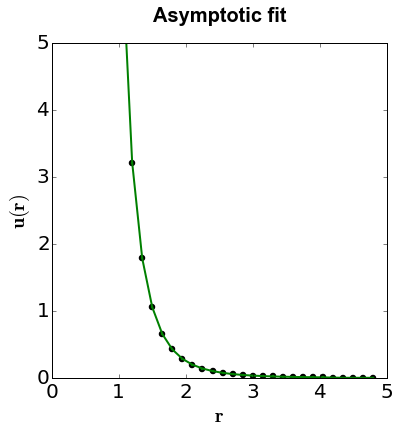

In [51]:
#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}
axescolor = '#f6f6f6'

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#actual data and labeling
plt.xlabel('$\mathbf{r}$', fontsize=20, fontdict = axis_label_font)
plt.ylabel('$\mathbf{u(r)}$', fontsize=20, fontdict = axis_label_font)
plt.plot(R, UR, c="g", linestyle = '-', linewidth = 2)
plt.scatter(R, UR, c="g", linestyle = '-', linewidth = 2)
plt.ylim((0,5.0))
plt.xlim((0,5.0))

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
plt.title("Asymptotic fit", y=1.05, fontdict = title_font)

In [52]:
print R
print UR

[ 0.3   0.45  0.6   0.75  0.9   1.05  1.2   1.35  1.5   1.65  1.8   1.95
  2.1   2.25  2.4   2.55  2.7   2.85  3.    3.15  3.3   3.45  3.6   3.75
  3.9   4.05  4.2   4.35  4.5   4.65  4.8 ]
[  3.29218107e+03   4.33538248e+02   1.02880658e+02   3.37119341e+01
   1.35480702e+01   6.26820927e+00   3.21502051e+00   1.78410795e+00
   1.05349788e+00   6.54139272e-01   4.23377131e-01   2.83737562e-01
   1.95881478e-01   1.38732175e-01   1.00469329e-01   7.41974039e-02
   5.57533115e-02   4.25466169e-02   3.29217466e-02   2.57950359e-02
   2.04417883e-02   1.63678719e-02   1.32302034e-02   1.07844814e-02
   8.82686920e-03   6.87959335e-03   3.06058504e-03   3.23381027e-04
   1.94290175e-05   1.05258060e-06   0.00000000e+00]


In [53]:
init_guess(R, UR, N_fix)

In [54]:
len(R)

31